In [59]:
from torch.utils.data import DataLoader

from Datasets import BaselineDataset_train, BaselineDataset_test
from Models import TransformerAgent, plot_losses
import torch

In [60]:
# Ensure data directory is populated with https://drive.google.com/drive/folders/1pjHyFlThbpXcvldabLOZZwf4dHaM-p54?usp=share_link

ticker = "AAPL"
data_dir = "../data"


baseline_dataset_train = BaselineDataset_train(ticker, data_dir)
baseline_dataloader_train = DataLoader(baseline_dataset_train, batch_size=32, shuffle=True)

baseline_dataset_test = BaselineDataset_test(ticker, data_dir)
baseline_dataloader_test = DataLoader(baseline_dataset_test, batch_size=1, shuffle=False)

In [61]:
print(len(baseline_dataset_train))
print(len(baseline_dataset_test))

2062
365


In [62]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
embedding_dim = len(baseline_dataset_train[0][0][0])
hidden_dim = 256
num_layers = 4
num_atn_heads = 1  # with 22 features, this can only be 1, 2, 11, or 22
checkpoint_dir = "./checkpoints/base_V1"
init_lr = .00002
lr_decay = 0.1
min_lr = 0.000001
decay_lr_every = 100
dropout  = 0.0
agent = TransformerAgent(embedding_dim, hidden_dim, num_atn_heads, num_layers, device, checkpoint_dir, init_lr, lr_decay, min_lr, decay_lr_every, dropout)

In [63]:
train_agent = False
if train_agent:
    agent.train(baseline_dataloader_train, 2000)

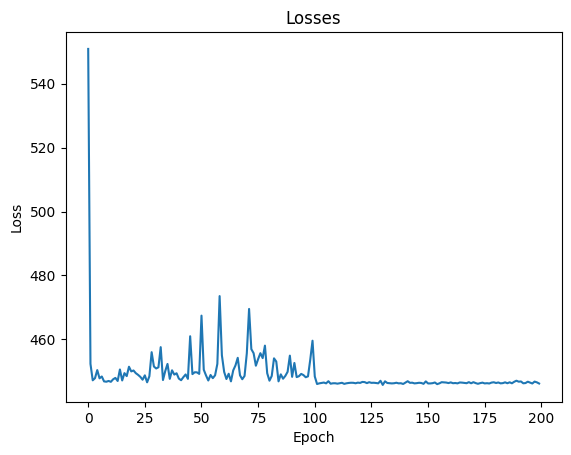

In [64]:
load_agent = True
checkpoint_file = "./checkpoints/base_V1/05-06_13-47-00_agent_200.pth"

if load_agent:
    agent.load_model(checkpoint_file)
    plot_losses("./checkpoints/base_V1/returns/05-06_13-47-00.npy")

Average Loss: 0.2163580364552729
Directional Accuracy: 0.4847161572052402


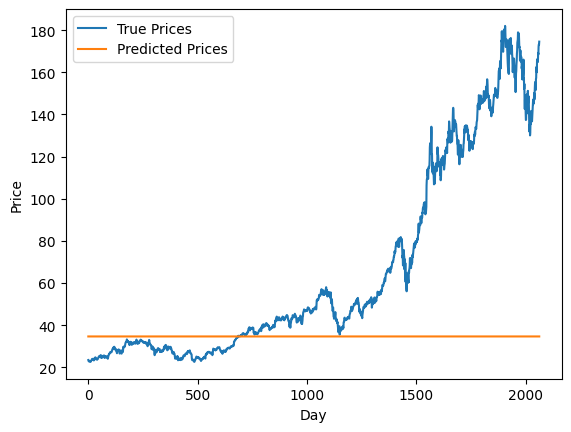

In [65]:
evaluate_agent_train = True
if evaluate_agent_train:
    agent.evaluate(DataLoader(baseline_dataset_train, batch_size=1, shuffle=False))

Average Loss: 0.6246688655794483
Directional Accuracy: 0.48626373626373626


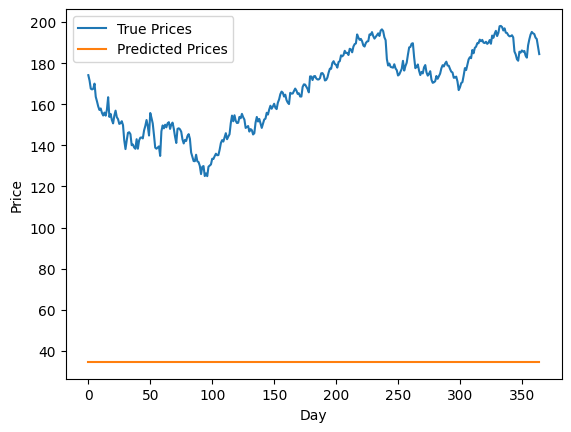

In [66]:
evaluate_agent = True
if evaluate_agent:
    agent.evaluate(baseline_dataloader_test)